In [4]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Loading the dataset
data = pd.read_csv('netflix1.csv')

# Display the first few rows of the dataset
data.head(5)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [62]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# Data Cleaning

In [6]:
# Checking for missing values
print(data.isnull().sum())


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [7]:
 # Drop duplicates if any
data.drop_duplicates(inplace=True)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [10]:
# check null values if any
data.isna().any()

show_id         False
type            False
title           False
director        False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
dtype: bool

In [12]:
# check duplicate data if any
data.duplicated().any()

False

In [13]:
# check number of rows and columns present in the dataset
data.shape

(8790, 10)

In [14]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

In [16]:
# Show data types to confirm changes
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [18]:
#describe all Statical analysis
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Exploratory Data Analysis (EDA)

## Content Type Distribution (Movies vs. TV Shows)

In [21]:
# Count the number of Movies and TV Shows
data['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

Text(0.5, 0.98, 'Total Content on Netflix')

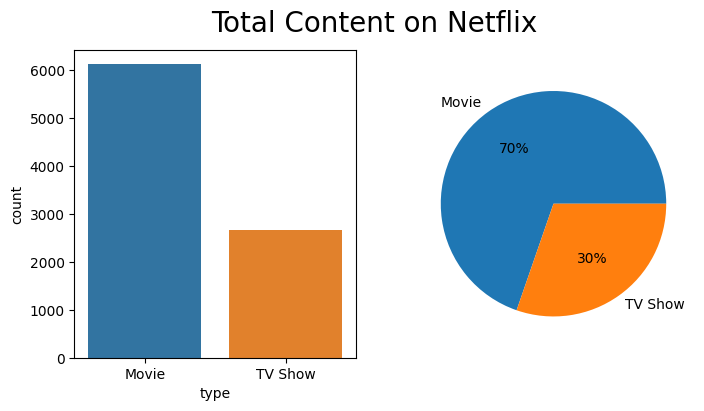

In [22]:
# Plot the distribution
freq=data['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(data, x=data['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

##  Most Common Genres

In [36]:

# Split 'listed_in' column to extract individual genres
data['listed_in'] = data['listed_in'].str.split(', ')

# Flatten the list of genres to get a single list of all genres
all_genres = [genre for sublist in data['listed_in'] for genre in sublist]


In [37]:
# Count the frequency of each genre
from collections import Counter
genre_counts = Counter(all_genres)

# Convert the counter into a DataFrame for easier plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)



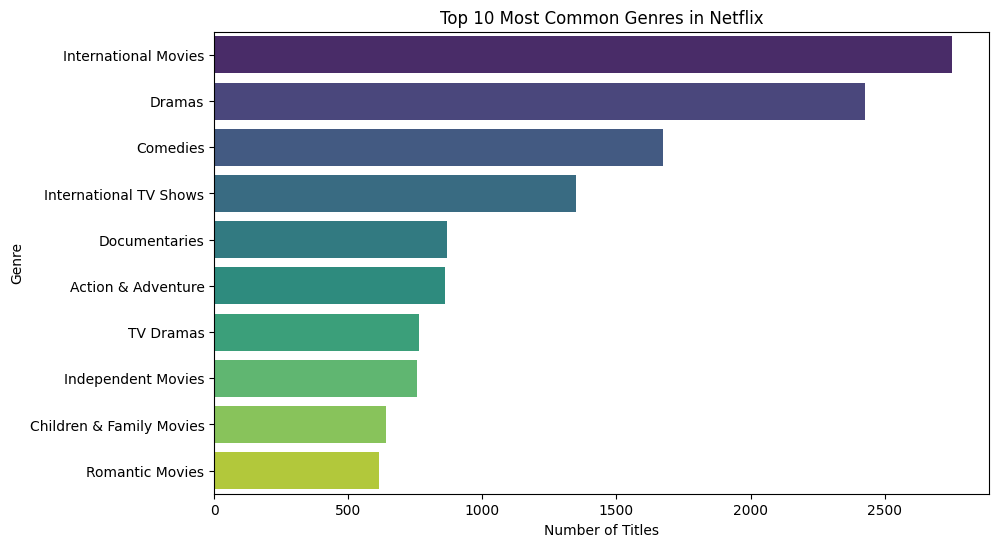

In [38]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a barplot to visualize the top 10 most common genres
sns.barplot(x='Count', y='Genre', data=genre_df.head(10), palette='viridis')
plt.title('Top 10 Most Common Genres in Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


In [40]:

# Display the top 10 genres with their counts
genre_df.head(10)


,Genre,Count
11,International Movies,2752
9,Dramas,2426
8,Comedies,1674
2,International TV Shows,1349
0,Documentaries,869
28,Action & Adventure,859
4,TV Dramas,762
10,Independent Movies,756
7,Children & Family Movies,641
18,Romantic Movies,616


## Content Added Over Time
 

In [28]:
# Extract year and month from 'date_added'
y=genre_counts.index,
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month


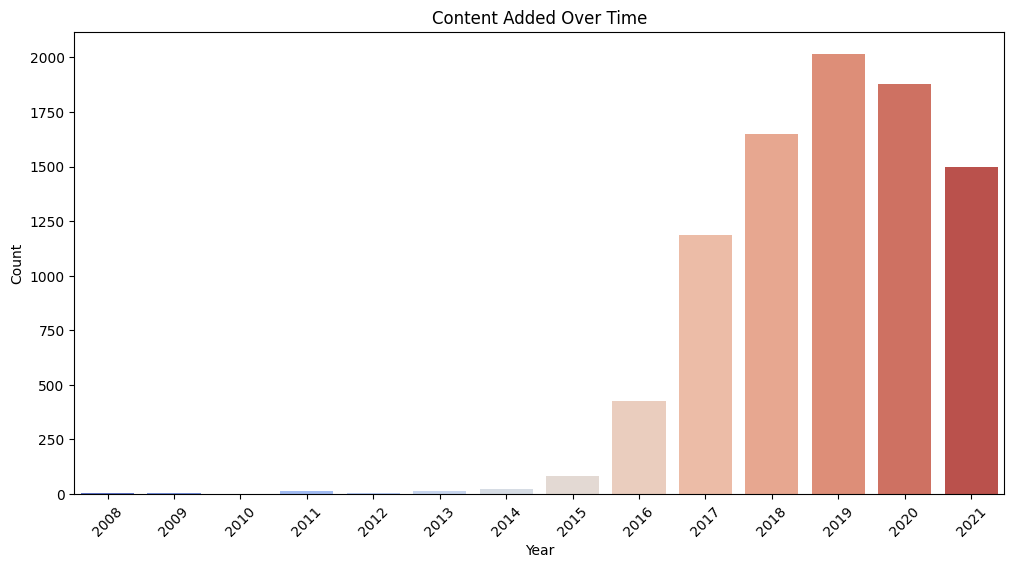

In [29]:
 # Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Top 10 Directors with the Most Titles

In [41]:
# Count the number of titles per director
top_directors = data['director'].value_counts().head(10)

# Display the top 10 directors
print(top_directors)

 

Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: director, dtype: int64


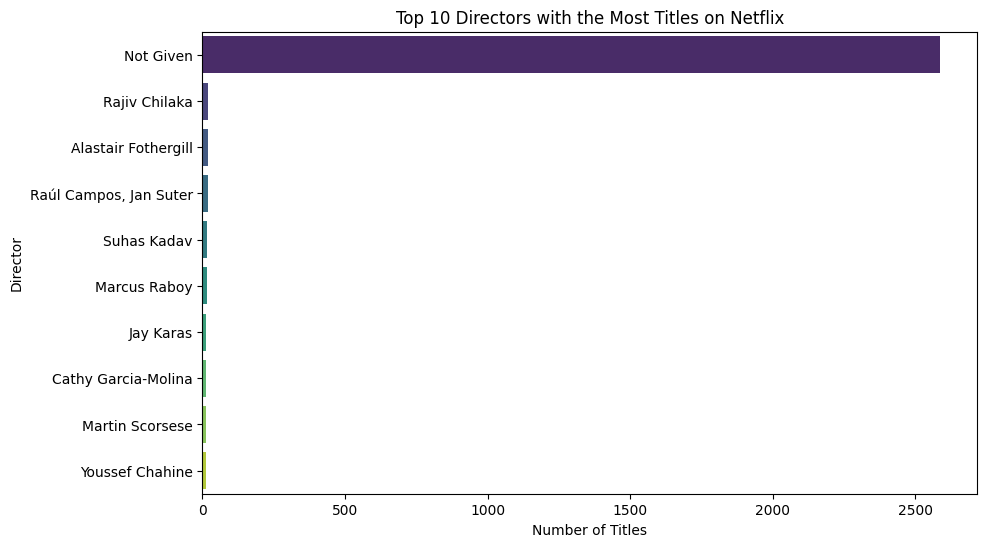

In [42]:

# Create a bar plot for the top 10 directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors with the Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


In [43]:
# Display the top 10 Directors
top_directors.head(10)

Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: director, dtype: int64

 ## Top 10 countries with most content on Netflix

In [46]:
# Get the top 10 countries with the most content
top_10_countries = data['country'].value_counts().head(10)


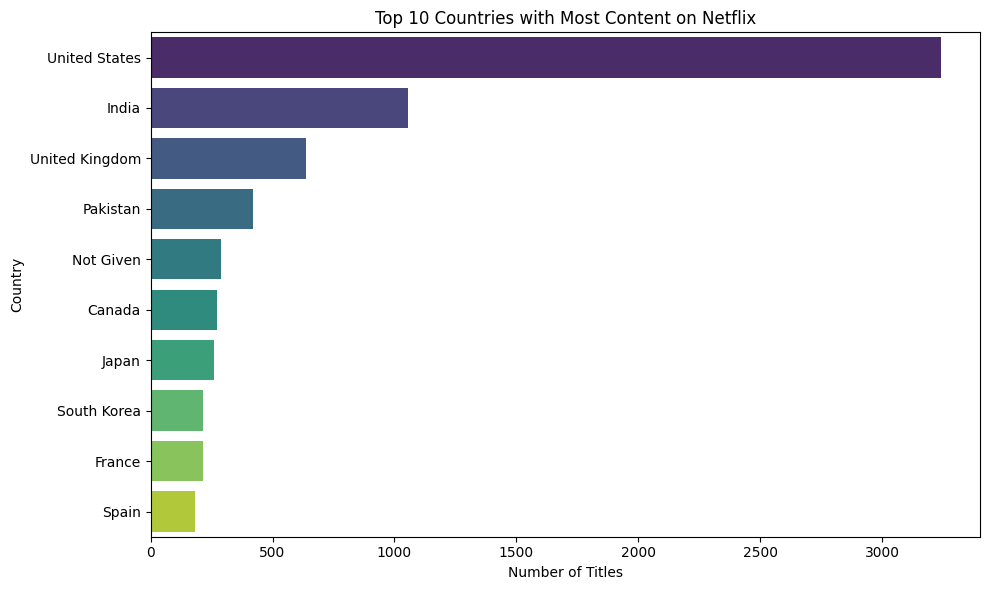

In [47]:
#Visualize the Top 10 Countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [48]:
# Display the top 10 countries with content counts
print(top_10_countries)

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: country, dtype: int64


## Monthly releases of Movies and TV shows on Netflix 

In [49]:
#Extract the month and year from 'date_added'
data['month_added'] = data['date_added'].dt.month
data['year_added'] = data['date_added'].dt.year
data['month_name_added'] = data['date_added'].dt.strftime('%B')

In [50]:
movies = data[data['type'] == 'Movie']
tv_shows = data[data['type'] == 'TV Show']


In [51]:
# Group by month name and count releases for movies and TV shows
monthly_releases_movies = movies['month_name_added'].value_counts().sort_index()
monthly_releases_tvshows = tv_shows['month_name_added'].value_counts().sort_index()


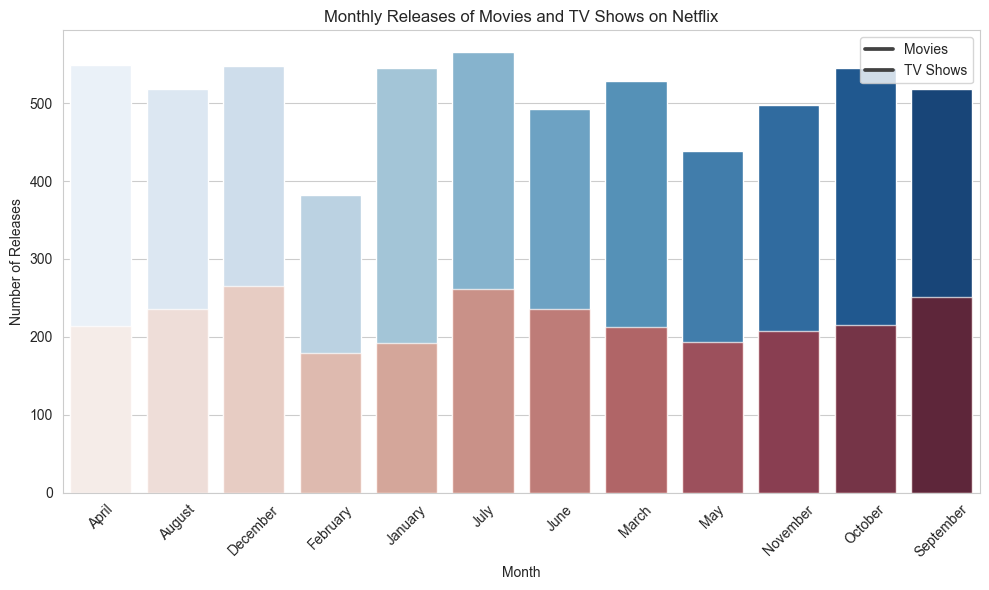

In [58]:
# Set the style for the plots
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Plot for Movies
sns.barplot(x=monthly_releases_movies.index, y=monthly_releases_movies.values, palette='Blues', label='Movies')

# Plot for TV Shows
sns.barplot(x=monthly_releases_tvshows.index, y=monthly_releases_tvshows.values, palette='Reds', label='TV Shows', alpha=0.7)

# Add titles and labels
plt.title('Monthly Releases of Movies and TV Shows on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend(['Movies', 'TV Shows'])

# Show the plot
plt.tight_layout()
plt.show(1)


In [53]:
# Filter for TV Shows only
tv_shows = data[data['type'] == 'TV Show']

# Count the number of TV Shows added each year
yearly_releases_tvshows = tv_shows['year_added'].value_counts().sort_index()


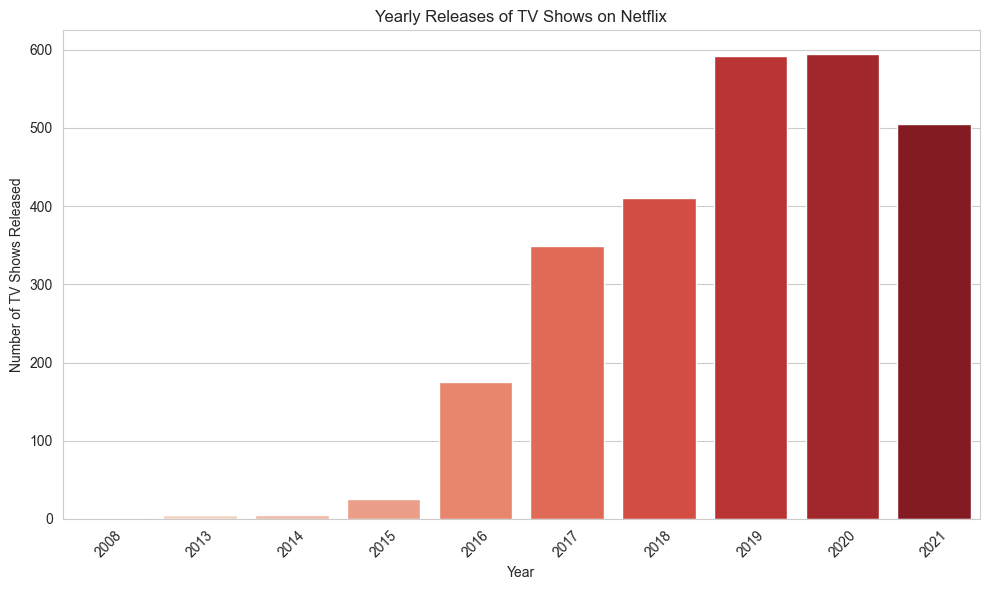

In [60]:
# Set the style for the plot
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Create a bar plot for yearly releases of TV shows
sns.barplot(x=yearly_releases_tvshows.index, y=yearly_releases_tvshows.values, palette='Reds')

# Add titles and labels
plt.title('Yearly Releases of TV Shows on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows Released')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


## conclusion

The analysis reveals that Netflix has been focusing on ramping up its original series production over the years, as evidenced by the increase in TV show releases. This aligns with industry trends where serialized content helps maintain long-term engagement. Additionally, the release pattern peaking in December suggests a targeted strategy to capture holiday viewership. Overall, while the emphasis on movies remains, the shift towards TV shows indicates a broader content strategy aimed at diversifying the platform's offerings.